# Regressão Linear Multivariada - Trabalho

## Estudo de caso: Qualidade de Vinhos

Nesta trabalho, treinaremos um modelo de regressão linear usando descendência de gradiente estocástico no conjunto de dados da Qualidade do Vinho. O exemplo pressupõe que uma cópia CSV do conjunto de dados está no diretório de trabalho atual com o nome do arquivo *winequality-white.csv*.

O conjunto de dados de qualidade do vinho envolve a previsão da qualidade dos vinhos brancos em uma escala, com medidas químicas de cada vinho. É um problema de classificação multiclasse, mas também pode ser enquadrado como um problema de regressão. O número de observações para cada classe não é equilibrado. Existem 4.898 observações com 11 variáveis de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide. 
7. Total sulfur dioxide. 
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).

O desempenho de referencia de predição do valor médio é um RMSE de aproximadamente 0.148 pontos de qualidade.

Utilize o exemplo apresentado no tutorial e altere-o de forma a carregar os dados e analisar a acurácia de sua solução. 


In [174]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [175]:
#Lendo dataset
data =  pd.read_csv('winequality-white.csv',delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [176]:
#Normaliza os dados, para o gradiente convergir mais rápido. E todas as features ter o mesmo peso na função de custo 
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(x_scaled)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


In [177]:
from math import sqrt

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    m = len(train)
    cost = [0.0 for i in range(n_epoch)]
    coef = [0.0 for i in range(len(train[0]))]
    print ('Coeficiente Inicial={0}' % (coef))
    for epoch in range(n_epoch):
        sum_error = 0
        for i,row in enumerate(train):            
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += (error**2)/m
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i] 
        print(('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error)))
        predicts = [0.0 for i in range(len(train))]
        for i,row in enumerate(df):
            predicts[i] = predict(row, coef)
        cost[epoch] = rmse_metric(train[-1],predicts)
    return coef,cost

# Example of making a prediction with coefficients
# Make a prediction
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

In [178]:
#Defini o passo de aprendizagem e o número de épocas
lr = 0.001
epoch = 50

In [179]:
#Executa o regressão linear multvariável com gradiente estocástico
[coefficients,cost] = coefficients_sgd(df,ls,epoch)

Coeficiente Inicial={0}
epoch=0, lrate=0.001, error=0.033
epoch=1, lrate=0.001, error=0.019
epoch=2, lrate=0.001, error=0.019
epoch=3, lrate=0.001, error=0.018
epoch=4, lrate=0.001, error=0.018
epoch=5, lrate=0.001, error=0.018
epoch=6, lrate=0.001, error=0.017
epoch=7, lrate=0.001, error=0.017
epoch=8, lrate=0.001, error=0.017
epoch=9, lrate=0.001, error=0.017
epoch=10, lrate=0.001, error=0.017
epoch=11, lrate=0.001, error=0.017
epoch=12, lrate=0.001, error=0.017
epoch=13, lrate=0.001, error=0.017
epoch=14, lrate=0.001, error=0.017
epoch=15, lrate=0.001, error=0.017
epoch=16, lrate=0.001, error=0.017
epoch=17, lrate=0.001, error=0.017
epoch=18, lrate=0.001, error=0.016
epoch=19, lrate=0.001, error=0.016
epoch=20, lrate=0.001, error=0.016
epoch=21, lrate=0.001, error=0.016
epoch=22, lrate=0.001, error=0.016
epoch=23, lrate=0.001, error=0.016
epoch=24, lrate=0.001, error=0.016
epoch=25, lrate=0.001, error=0.016
epoch=26, lrate=0.001, error=0.016
epoch=27, lrate=0.001, error=0.016
epoch=

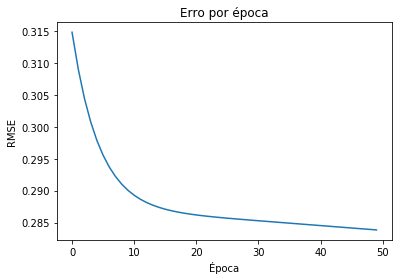

In [180]:
plt.plot(cost)
plt.xlabel('Época')
plt.ylabel('RMSE')
plt.title('Erro por época')
plt.show()

In [181]:
print('Para lr = {0} e epoch = {1}\nRMSE = {2}'.format(ls,epoch,cost[-1]))

Para lr = 0.001 e epoch = 50
RMSE = 0.2838620445019942


É possível observar através do gráfico de erro por época, que o algoritmo esta aprendendo. O erro foi próximo do esperado, mas não foi exato. Isto porque, foi utilizado o método do gradiente estocástico. Apesar do método convergir mais rápido para próximo do ponto de mínimo, ele fica variando muito em torno do mínimo. Uma solução seria utilizar o gradiente em lotes, que demora mais para convergir, porém não fica variando. Ou utilizar o método dos mínimos quadrados que chega no mínimo em uma interação. 

Os dados de erro foram calculados no conjunto de treino. Caso fosse utilizado um conjunto de teste, o erro provavelmente seria maior, e poderia estar havendo overfitting. A solução para isto, seria utilizar regularização. 